# Yelp Review

In [1]:
import pandas as pd
import tqdm
from tqdm import tqdm
import regex as re 
import spacy
nlp = spacy.load("en_core_web_lg")

### Overview
My goal with this Machine Learning Model is to help Yelp or a Business Owner automactically rate a reviewer's review. I used the 'text' columns which represents the review

## Data Exploration

In [2]:
reviews_df = pd.read_csv('data/review.csv', engine='python', error_bad_lines=False)
business_df = pd.read_csv('data/business.csv', engine='python', error_bad_lines=False)

In [3]:
reviews_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,6.0,1.0,0.0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5.0,0.0,0.0,0.0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5.0,3.0,0.0,0.0,I have to say that this office really has it t...,2016-11-09 20:09:03
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5.0,0.0,0.0,0.0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1.0,7.0,0.0,0.0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38


In [4]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,hours,attributes.GoodForKids,attributes.RestaurantsReservations,attributes.GoodForMeal,attributes.BusinessParking,attributes.Caters,attributes.NoiseLevel,attributes.RestaurantsTableService,attributes.RestaurantsTakeOut,attributes.RestaurantsPriceRange2,attributes.OutdoorSeating,attributes.BikeParking,attributes.Ambience,attributes.HasTV,attributes.WiFi,attributes.Alcohol,attributes.RestaurantsAttire,attributes.RestaurantsGoodForGroups,attributes.RestaurantsDelivery,hours.Monday,hours.Tuesday,hours.Wednesday,hours.Thursday,hours.Friday,hours.Saturday,hours.Sunday,attributes.BusinessAcceptsCreditCards,attributes,attributes.BusinessAcceptsBitcoin,attributes.ByAppointmentOnly,attributes.AcceptsInsurance,attributes.Music,attributes.GoodForDancing,attributes.CoatCheck,attributes.HappyHour,attributes.BestNights,attributes.WheelchairAccessible,attributes.DogsAllowed,attributes.BYOBCorkage,attributes.DriveThru,attributes.Smoking,attributes.AgesAllowed,attributes.HairSpecializesIn,attributes.Corkage,attributes.BYOB,attributes.DietaryRestrictions,attributes.Open24Hours,attributes.RestaurantsCounterService
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,"Golf, Active Life",NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"Specialty Food, Restaurants, Dim Sum, Imported...",NaN,True,True,"{'dessert': False, 'latenight': False, 'lunch'...","{'garage': False, 'street': False, 'validated'...",True,u'loud',True,True,2,False,False,"{'romantic': False, 'intimate': False, 'classy...",False,u'no',u'full_bar',u'casual',True,False,9:0-0:0,9:0-0:0,9:0-0:0,9:0-0:0,9:0-1:0,9:0-1:0,9:0-0:0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"Sushi Bars, Restaurants, Japanese",NaN,True,True,"{'dessert': False, 'latenight': False, 'lunch'...","{'garage': False, 'street': False, 'validated'...",False,u'average',True,True,2,False,True,"{'romantic': False, 'intimate': False, 'touris...",True,u'no',u'beer_and_wine','casual',True,False,17:30-21:30,NaN,17:30-21:30,17:30-21:30,17:30-22:0,17:30-22:0,17:30-21:0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,"Insurance, Financial Services",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8:0-17:0,8:0-17:0,8:0-17:0,8:0-17:0,8:0-17:0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"Plumbing, Shopping, Local Services, Home Servi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7:0-23:0,7:0-23:0,7:0-23:0,7:0-23:0,7:0-23:0,7:0-23:0,7:0-23:0,True,NaN,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
reviews_df.shape

(6685902, 9)

In [6]:
business_df['state'].value_counts()

AZ     56686
NV     36312
ON     33412
NC     14720
OH     14697
PA     11216
QC      9219
AB      8012
WI      5154
IL      1932
SC      1162
NY        22
CA        19
TX         6
FL         4
XGM        4
CT         3
AL         3
WA         3
AK         2
VT         2
NE         2
VA         2
GA         2
XWY        2
TN         1
BC         1
CON        1
UT         1
XGL        1
DOW        1
NM         1
BAS        1
NJ         1
AR         1
DUR        1
Name: state, dtype: int64

In [7]:
reviews_df_copy = reviews_df.drop(columns = {'review_id', 'date', 'useful', 'funny', 'cool'})
business_df_copy = business_df.drop(columns = {'name', 'address', 'postal_code', 'latitude', 'longitude', 'is_open', 'city', 'review_count','hours','attributes.GoodForKids', 'attributes.RestaurantsReservations', 'attributes.GoodForMeal', 'attributes.BusinessParking', 'attributes.Caters', 'attributes.NoiseLevel', 'attributes.RestaurantsTableService', 'attributes.RestaurantsTakeOut', 'attributes.RestaurantsPriceRange2', 'attributes.OutdoorSeating','attributes.BikeParking', 'attributes.Ambience', 'attributes.HasTV', 'attributes.WiFi', 'attributes.Alcohol', 'attributes.RestaurantsAttire', 'attributes.RestaurantsGoodForGroups', 'attributes.RestaurantsDelivery', 'hours.Monday', 'hours.Tuesday', 'hours.Wednesday', 'hours.Thursday', 'hours.Friday', 'hours.Saturday', 'hours.Sunday','attributes.BusinessAcceptsCreditCards','attributes','attributes.BusinessAcceptsBitcoin','attributes.ByAppointmentOnly','attributes.AcceptsInsurance','attributes.Music','attributes.GoodForDancing','attributes.CoatCheck','attributes.HappyHour','attributes.BestNights','attributes.WheelchairAccessible','attributes.DogsAllowed','attributes.BYOBCorkage','attributes.DriveThru','attributes.Smoking','attributes.AgesAllowed','attributes.HairSpecializesIn','attributes.Corkage','attributes.BYOB','attributes.DietaryRestrictions','attributes.Open24Hours','attributes.RestaurantsCounterService'})
business_df_copy = business_df_copy.rename(columns={'stars' : 'rating'})

In [8]:
''' Merging the DataFrames '''
reviews_df_merged = pd.merge(reviews_df_copy, business_df_copy, how='inner')

In [9]:
print(reviews_df_merged.shape)
reviews_df_merged.head()

(6685900, 7)


,user_id,business_id,stars,text,state,rating,categories
0,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,Total bill for this horrible service? Over $8G...,NV,2.5,"Fitness & Instruction, Doctors, Health & Medic..."
1,RBXSJA372ilErzNwz0jXvQ,ujmEBvifdJM6h6RLv4wQIg,4.0,My family has used this ER four times in the p...,NV,2.5,"Fitness & Instruction, Doctors, Health & Medic..."
2,x3brMMbJrAW9PwW5A6YL5w,ujmEBvifdJM6h6RLv4wQIg,1.0,I have never been more disappointed by the car...,NV,2.5,"Fitness & Instruction, Doctors, Health & Medic..."
3,Skzdl0sWhW88525a1vr59g,ujmEBvifdJM6h6RLv4wQIg,1.0,"Went in for a broken finger, was asked if I wa...",NV,2.5,"Fitness & Instruction, Doctors, Health & Medic..."
4,3Y25VDfnQVcuc33T-U3Z6A,ujmEBvifdJM6h6RLv4wQIg,5.0,My mother was at Mountain View for nearly two ...,NV,2.5,"Fitness & Instruction, Doctors, Health & Medic..."


### Filter the Dataframe on Ontario and Restaurant

In [10]:
reviews_df_merged = reviews_df_merged[reviews_df_merged['state']=='ON']
reviews_df_merged.shape

(784461, 7)

In [11]:
reviews_df_merged.isnull().sum()

user_id          0
business_id      0
stars            0
text             0
state            0
rating           0
categories     326
dtype: int64

In [12]:
reviews_df_merged = reviews_df_merged.dropna()
reviews_df_merged.shape

(784135, 7)

In [13]:
categories = ['Restaurant', 'Restaurants']
reviews_df_merged = reviews_df_merged[reviews_df_merged['categories'].str.contains('|'.join(categories))]
reviews_df_merged.shape

(574253, 7)

In [14]:
reviews_df_merged.head()

,user_id,business_id,stars,text,state,rating,categories
592,jlu4CztcSxrKx56ba1a5AQ,3fw2X5bZYeW9xCz_zGhOHg,3.0,Tracy dessert had a big name in Hong Kong and ...,ON,3.5,"Food, Chinese, Restaurants, Desserts"
593,nkSf1NKWFGiAyrnCa-A5UA,3fw2X5bZYeW9xCz_zGhOHg,3.0,The squid balls were AMAZING. Crispy exterior ...,ON,3.5,"Food, Chinese, Restaurants, Desserts"
594,jG7130OQWiftvHhtyabsog,3fw2X5bZYeW9xCz_zGhOHg,4.0,"Must Try: Mango Sago with Pommels, Shaved Ice ...",ON,3.5,"Food, Chinese, Restaurants, Desserts"
595,wdCwBv_TA_Y-IjUZv2HWWQ,3fw2X5bZYeW9xCz_zGhOHg,1.0,We came on a Friday and the store said that th...,ON,3.5,"Food, Chinese, Restaurants, Desserts"
596,kxz6Q2AERQeo9x6nnbHZNg,3fw2X5bZYeW9xCz_zGhOHg,3.0,I think this is a cool little hang out place f...,ON,3.5,"Food, Chinese, Restaurants, Desserts"


In [15]:
reviews_df_merged['categories'].value_counts()

Chinese, Restaurants                                                                                                      8691
Restaurants, Chinese                                                                                                      6846
Italian, Restaurants                                                                                                      5569
Thai, Restaurants                                                                                                         5291
Restaurants, Italian                                                                                                      5226
                                                                                                                          ... 
Restaurants, Day Spas, Hair Salons, Pizza, Beauty & Spas                                                                     3
Food, Beer, Wine & Spirits, Restaurants, Bars, Canadian (New), Nightlife                                       

In [16]:
reviews_df_merged['categories'].nunique()

8299

<AxesSubplot:>

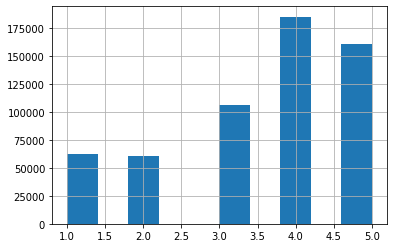

In [18]:
reviews_df_merged['stars'].hist()

### Tokenize, Remove Stop words, and Punct

In [83]:
df = reviews_df_merged.sample(12000).reset_index()
df.head()

,index,user_id,business_id,stars,text,state,rating,categories
0,4210903,0AnezUtzwmaeAYSMvDdLmg,fpuyZ31OpX11UlJGFWKoNw,5.0,So the day started at the Doctors office this ...,ON,4.0,"Breakfast & Brunch, Diners, Restaurants, Ameri..."
1,2272491,4BPiY226-7O6gbPKRUUQ7w,e41TP5cXZqSrz50xCBJqZw,4.0,The ambience of the restaurant when we first w...,ON,4.0,"French, Bars, Caterers, Canadian (New), Breakf..."
2,6170509,XJ70wyy7EylqV37wroJnVQ,KpFgHrxoVOiwfpR0f5KXUA,2.0,I was really excited to visit this restaurant ...,ON,4.0,"Cafes, Food, Vegetarian, Vegan, Restaurants, J..."
3,4272037,7d53zw1i0xGyD-8xo4h8RA,tTzQZTrwBgwxMch77nCJfQ,4.0,I'm glad this was my first vegan dining experi...,ON,4.0,"Restaurants, Vegan, Vegetarian, Grocery, Juice..."
4,5865208,74cvJCRgdRpF0EKSvbnLKg,dnL3yOplcB8x7-aVOpWD_Q,1.0,"Absolutely terrible service.\n\nRude hostess, ...",ON,2.5,"Restaurants, Pizza"


In [84]:
def token_clean(doc_list):
    #Extract tokens from reviews using Spacy
    # nlp.Defaults.stop_words |= {"my_new_stopword1","my_new_stopword2",}

    other_words = []

    tokens = []

    for document in tqdm(doc_list):
        doc = re.sub("[^a-zA-Z]+"," ",str(document))
        doc = doc.lower().strip()
        doc = nlp(doc)
        doc = [token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True) and (str(token) not in other_words) and (str(token).isdigit() != True) and (len(str(token)) >1)]
        tokens.append(doc)
        
    return tokens

In [85]:
df['tokens'] = token_clean(df['text'])

100%|██████████| 12000/12000 [27:07<00:00,  7.37it/s]


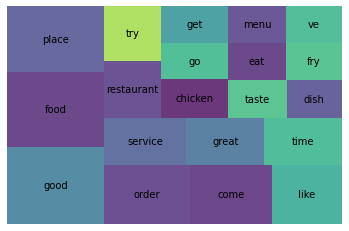

In [86]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')
    
wc = count(df['tokens'])

import squarify
import matplotlib.pyplot as plt
import seaborn as sns

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

### Find Baseline

In [89]:
df['rating'].value_counts(normalize=True).sort_index()

1.0    0.001000
1.5    0.003500
2.0    0.022083
2.5    0.058417
3.0    0.190667
3.5    0.328000
4.0    0.303333
4.5    0.088833
5.0    0.004167
Name: rating, dtype: float64

In [93]:
df['rating_grade'] = ["Not Good" if rate<4.0 else "Good" for rate in df['rating']]
df['rating_grade'].value_counts(normalize=True).sort_index()

Good        0.396333
Not Good    0.603667
Name: rating_grade, dtype: float64

## Check TFIDF features

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1,2),
                      max_df=0.97,
                      min_df=2)

description = df['tokens'].astype(str)

dtm = tfidf.fit_transform(description)

dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

dtm.head()

,aaa,aaa oz,abalone,abandon,abbas,aber,aberdeen,aberration,abhorrent,ability,abit,able,able accommodate,able accomodate,able afford,able answer,able appreciate,able ask,able bring,able catch,able change,able choose,able come,able eat,able enjoy,able explain,able feel,able figure,able find,able finish,able fit,able good,able grab,able handle,able offer,able open,able order,able pay,able pick,able place,able private,able provide,able recommend,able relax,able reservation,able reserve,able review,able salad,able sample,able seat,able service,able share,able sit,able snag,able squeeze,able stop,able substitute,able table,able taste,able tell,able try,able walk,able want,abnormally,abomination,abroad,abrupt,abruptly,abs,absence,absent,absent minded,absolute,absolute bad,absolute crap,absolute delight,absolute fav,absolute favorite,absolute favourite,absolute gem,absolute good,absolute perfection,absolute pleasure,absolute try,absolutely,absolutely adorable,absolutely adore,absolutely amazing,absolutely awesome,absolutely awful,absolutely bad,absolutely beautiful,absolutely blow,absolutely come,absolutely complaint,absolutely crave,absolutely delicious,absolutely delightful,absolutely delish,absolutely disgusted,absolutely disgusting,absolutely divine,absolutely don,absolutely excellent,absolutely fantastic,absolutely frill,absolutely good,absolutely gorgeous,absolutely great,absolutely hate,absolutely horrible,absolutely incredible,absolutely love,absolutely lovely,absolutely mouth,absolutely order,absolutely outstanding,absolutely pack,absolutely parking,absolutely perfect,absolutely recommend,absolutely return,absolutely ridiculous,absolutely right,absolutely scrumptious,absolutely starve,absolutely stuff,absolutely stunning,absolutely superb,absolutely surprise,absolutely taste,absolutely terrible,absolutely try,absolutely unacceptable,absolutely wonderful,absolutely worth,absolutely zero,absorb,abstract,absurd,abundance,abundant,aburi,aburi delicious,aburi sushi,aburi torch,abuse,abysmal,ac,academic,acai,acai bowl,acc,acc place,accent,accent difficult,accent fresh,accept,accept card,accept cash,accept credit,accept debit,accept reservation,accept type,accept visa,acceptable,acceptable dish,acceptable especially,acceptable overall,acceptable worth,access,accessibility,accessible,accessible washroom,accident,accident don,accidental,accidentally,accidentally order,accidentally spill,accidently,acclaim,acclaimed,accommodate,accommodate big,accommodate customer,accommodate dietary,accommodate family,accommodate food,accommodate good,accommodate group,accommodate highly,accommodate large,accommodate lot,accommodate love,accommodate menu,accommodate need,accommodate party,accommodate people,accommodate place,accommodate request,accommodate seven,accommodate small,accommodate staff,accommodate table,accommodating,accommodating ask,accommodating come,accommodating dietary,accommodating food,accommodating gluten,accommodating good,accommodating helpful,accommodating request,accommodation,accomodate,accomodate group,accomodating,accompaniment,accompaniment chicken,accompany,accompany delicious,accompany dish,accompany generous,accompany meal,accompany nice,accompany picture,accompany sauce,accompany soup,accompany sweet,accompany tasty,accompany veggie,accompanying,accomplish,accomplishment,accord,accord dad,accord friend,accord google,accord menu,accord owner,accord website,accordingly,account,account write,accountability,accoutrement,accuracy,accurate,accurate definitely,...,yesterday go,yesterday good,yesterday hear,yesterday lunch,yesterday night,yesterday order,yesterday want,yield,yikes,yin,yin ji,ymca,yo,yoga,yoghurt,yogurt,yogurt drink,yogurt granola,yogurt green,yogurt parfait,yogurt sauce,yogurt smoothie,yokohama,yolk,yolk black,yolk cook,yolk runny,yolo,yonge,yonge area,yonge bloor,yonge carlton,yonge college,yonge dundas,yonge eg,yonge eglington,yonge eglinton,yonge elgin,yonge finch,yonge lawrence,yonge location,yonge near,yo

## Random Forest Classifier

##### Burrito Applied Modeling/Define ML problems

In [99]:
df['tokens']= df['tokens'].astype(str)

# Define how much percent data you wanna split
split_pcent = 0.20
split = int(split_pcent * len(df))

# Shuffles dataframe
df = df.sample(frac=1).reset_index(drop=True)

# Training Sets
train = df[split:]

# Validation Sets
valid = df[:split]

In [110]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=5000, algorithm='randomized',n_iter=10)
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
rfc = RandomForestClassifier()

In [114]:
params = {
    'lsi__svd__n_components': [10,50,100],
    'lsi__vect__min_df':[.02,.05],
    'lsi__vect__max_df':[.9, .95, 1.0],
    'lsi__vect__ngram_range':[(1,1),(1,2),(1,3)],
    'clf__n_estimators':[300,500,1000]}

In [115]:
# LSI
lsi = Pipeline([('vect', vect), ('svd', svd)])


# Pipe
pipe = Pipeline([('lsi', lsi), ('clf', rfc)])

In [116]:
# Fit
from sklearn.model_selection import RandomizedSearchCV

grid_search = RandomizedSearchCV(pipe,params, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(train['tokens'], train['rating_grade'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 17.8min
/Users/ashleyadrias/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 19.6min finished


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('lsi',
                                              Pipeline(steps=[('vect',
                                                               TfidfVectorizer(ngram_range=(1,
                                                                                            2),
                                                                               stop_words='english')),
                                                              ('svd',
                                                               TruncatedSVD(n_components=5000,
                                                                            n_iter=10))])),
                                             ('clf',
                                              RandomForestClassifier())]),
                   n_jobs=-1,
                   param_distributions={'clf__n_estimators': [300, 500, 1000],
                                        'lsi__svd__n_components

In [117]:
grid_search.best_score_

0.6409374999999999

In [118]:
grid_search.best_params_

{'lsi__vect__ngram_range': (1, 3),
 'lsi__vect__min_df': 0.02,
 'lsi__vect__max_df': 0.9,
 'lsi__svd__n_components': 50,
 'clf__n_estimators': 300}